In [2]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/content/ecommerce_orders.csv") # .read_csv() reads .csv files

In [4]:
data.head() #by default the .head() will display the first 5 records of the dataset

,order_id,order_date,customer_id,customer_age,city,state,channel,device,payment_method,category,...,customer_satisfaction,return_flag,return_reason,fraud_score,risk_label,order_status,month,is_delivered,is_returned,is_cancelled
0,ORD32297163,2025-09-29,368485,53.0,Mumbai,Maharashtra,Affiliate,iOS,UPI,Sports,...,3.0,1,Wrong Item,0.328,Medium,Returned,2025-09,0,1,0
1,ORD21419466,2025-08-14,848708,24.0,Mumbai,Maharashtra,Organic,Android,COD,Electronics,...,4.0,0,NaN,0.217,Low,Cancelled,2025-08,0,0,1
2,ORD98602555,2025-08-27,678409,42.0,Bengaluru,Karnataka,Referral,Web,Debit Card,Electronics,...,3.0,0,NaN,0.049,Low,Delivered,2025-08,1,0,0
3,ORD77384776,2025-11-19,558738,64.0,Unknown,Karnataka,Social,iOS,Wallet,Sports,...,4.0,0,NaN,0.107,Low,Delivered,2025-11,1,0,0
4,ORD81037647,2025-08-15,631056,38.0,Delhi,Delhi,Referral,Android,UPI,Grocery,...,5.0,0,NaN,0.010,Low,Delivered,2025-08,1,0,0


In [5]:
#checking missing values from the data
data.isna().sum()

,0
order_id,0
order_date,0
customer_id,0
customer_age,0
city,2
state,0
channel,0
device,0
payment_method,0
category,0


In [9]:
data['payment_method'].head()

,payment_method
0,UPI
1,COD
2,Debit Card
3,Wallet
4,UPI


In [6]:
data['return_reason'].head()

,return_reason
0,Wrong Item
1,NaN
2,NaN
3,NaN
4,NaN


In [7]:
#imputing the missing values (NaN values) with 'Unknown'
data['return_reason']=data['return_reason'].fillna("Unknown")

In [8]:
data['return_reason'].head()

,return_reason
0,Wrong Item
1,Unknown
2,Unknown
3,Unknown
4,Unknown


KPIs

- Count of total orders
- Sum of gross revenue
- Sum of net revenue
- Average order value


In [10]:
total_orders=len(data) #length of the data - calculates the number of records in the dataset

In [11]:
print(total_orders)

6486


In [12]:
print(data['gross_amount'].sum()) #sum of gross revenue

32897798.060000002


In [13]:
data['net_amount'].head()

,net_amount
0,8841.34
1,7839.76
2,2384.46
3,2773.99
4,4563.75


In [14]:
#imputing missing values from net_amount by the median of this column
data['net_amount']=data['net_amount'].fillna(data['net_amount'].median())

In [17]:
print(data['net_amount'].sum()) #sum of net revenue

36303772.480000004


In [18]:
print(data['net_amount'].mean()) #average order value

5597.251384520507


category
Electronics    929
Beauty         928
Sports         927
Home           927
Grocery        926
Fashion        925
Books          924
Name: count, dtype: int64


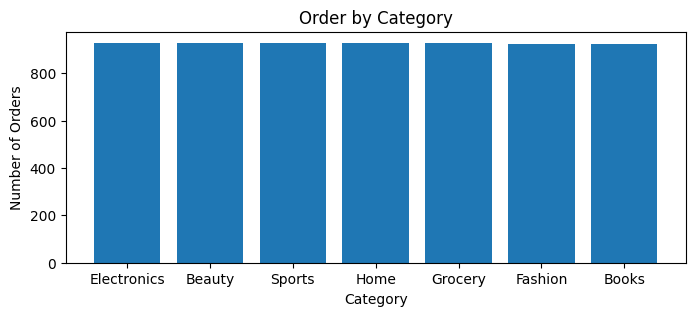

In [23]:
#Creating a bar graph showing orders by category
data['category'].unique() #unique categories in the dataset

order_by_cat=data['category'].value_counts().sort_values(ascending=False) #ordering in descending order
print(order_by_cat) #count of orders/category

plt.figure(figsize=(8,3))
plt.bar(order_by_cat.index,order_by_cat.values)
plt.title("Order by Category")
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.show()

In [24]:
data['payment_method'].unique()

array(['UPI', 'COD', 'Debit Card', 'Wallet', 'Credit Card', 'NetBanking',
       'NETBANKING', 'Unknown', 'CREDIT CARD', 'DEBIT CARD', 'WALLET'],
      dtype=object)

In [25]:
data['payment_method'].value_counts()

,count
payment_method,
UPI,2192
Credit Card,1086
COD,1010
Wallet,804
NetBanking,626
Debit Card,622
Unknown,96
CREDIT CARD,20
DEBIT CARD,12


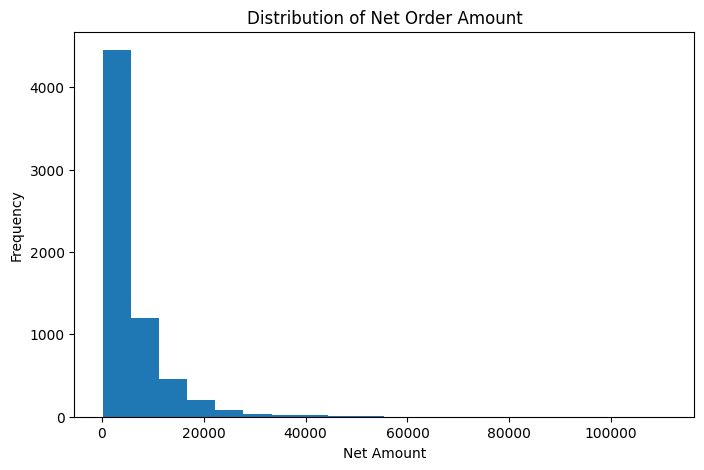

In [34]:
#Net amount distribution
plt.figure(figsize=(8,5))
plt.hist(data['net_amount'],bins=20) #bins will manage the thickness of the bars in the Histogram
plt.title("Distribution of Net Order Amount")
plt.xlabel("Net Amount")
plt.ylabel("Frequency")
plt.show()

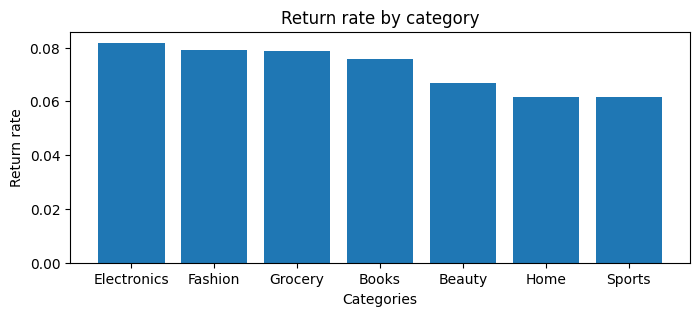

In [38]:
#creating a visualization to show the return rate by category

return_by_cat=data.groupby("category")['is_returned'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,3))
plt.bar(return_by_cat.index,return_by_cat.values)
plt.title("Return rate by category")
plt.xlabel("Categories")
plt.ylabel("Return rate")
plt.show()